In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)

Attaching SeuratObject



In [8]:
#
mm<-readMM('../../../下载/sle_flare_GSE137029/matrix.mtx.gz')
features=read.table('../../../下载/sle_flare_GSE137029/features.tsv.gz',sep='\t')
bar<-read.table('../../../下载/sle_flare_GSE137029/barcodes.tsv.gz',sep='\t')
rownames(mm)<-bar$V1
colnames(mm)<-features$V1
sle<-CreateSeuratObject(counts=t(mm),project='sle')

Warning message:
“The following arguments are not used: row.names”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [9]:
#hd rds
hd<-readRDS('../ucsc_pbmc_hd.rds')

In [10]:
data.list<-list(sle,hd)
data.list <- lapply(X = data.list, FUN = function(x) {
    x <- NormalizeData(x, verbose = FALSE)
    x <- FindVariableFeatures(x, verbose = FALSE)
})
features <- SelectIntegrationFeatures(object.list = data.list)
data.list <- lapply(X = data.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})
anchors <- FindIntegrationAnchors(object.list = data.list, reference = c(1,2), reduction = "rpca",
    dims = 1:50)
data.integrated <- IntegrateData(anchorset = anchors, dims = 1:50)
data.integrated <- ScaleData(data.integrated, verbose = FALSE)
data.integrated <- RunPCA(data.integrated, verbose = FALSE)
data.integrated <- RunUMAP(data.integrated, dims = 1:50)
data.integrated<-FindNeighbors(data.integrated,dims=1:50)


Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 21176 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:26:07 UMAP embedding parameters a = 0.9922 b = 1.112

15:26:07 Read 315719 rows and found 50 numeric columns

15:26:07 Using Annoy for neighbor search, n_neighbors = 30

15:26:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   6

In [11]:
DefaultAssay(data.integrated)<-'integrated'
data.integrated<-FindClusters(data.integrated,res=0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 315719
Number of edges: 10431468

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9736
Number of communities: 19
Elapsed time: 217 seconds


3 singletons identified. 16 final clusters.



In [12]:
orig<-data.integrated@meta.data$orig.ident
orig[orig!='sle']<-'HD'
orig[orig=='sle']<-'SLE'
data.integrated@meta.data$orig.ident<-orig

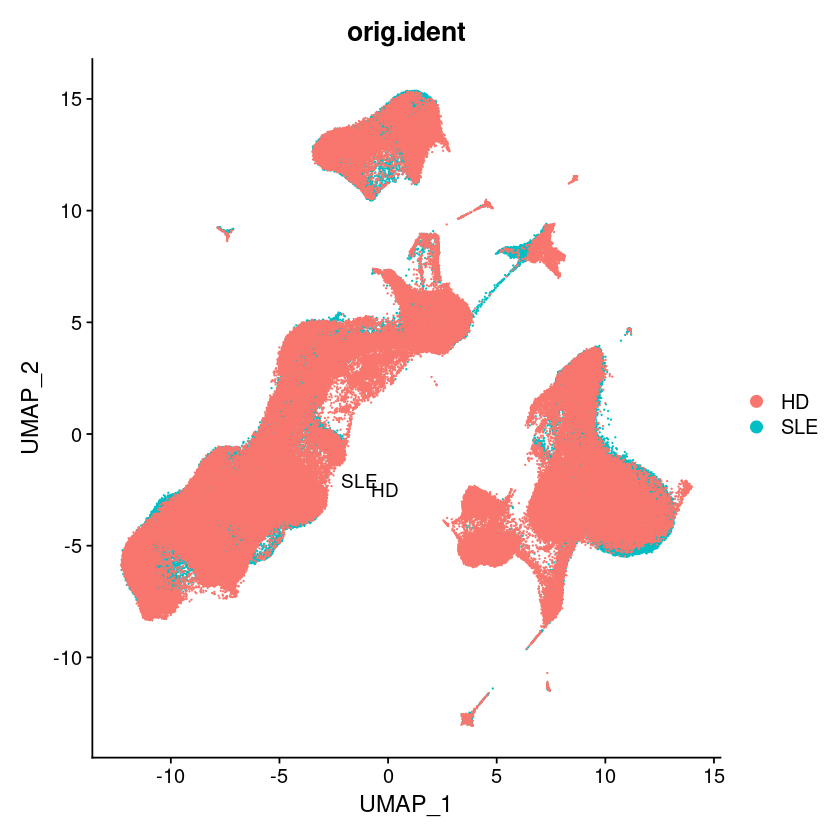

In [13]:
p1<-DimPlot(data.integrated,group.by=c('orig.ident'),raster=F,label=T)
p1

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



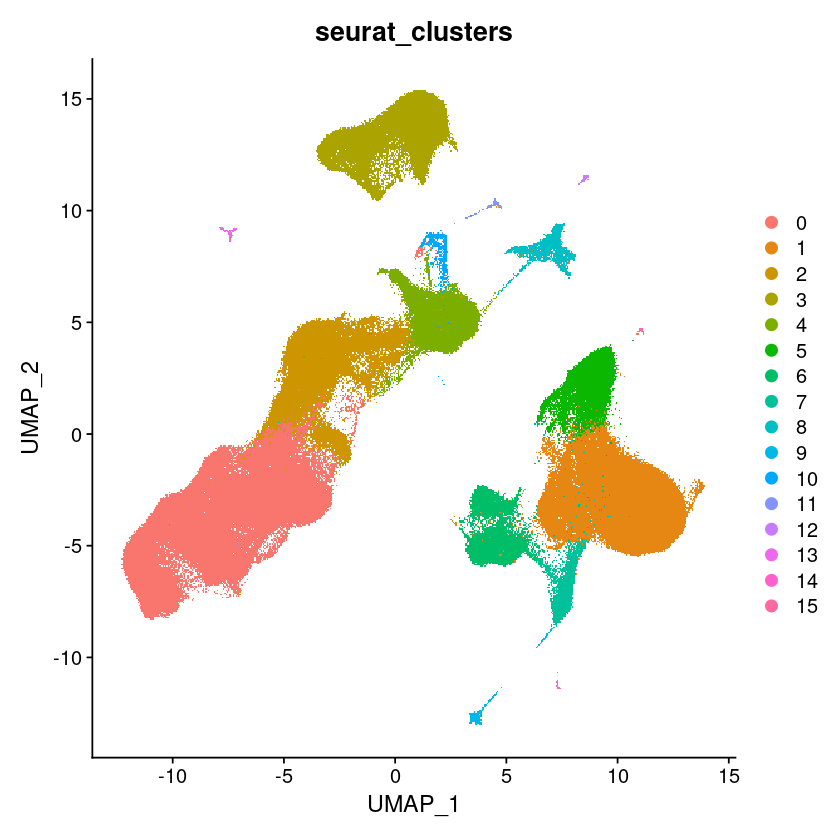

In [14]:
p2<-DimPlot(data.integrated,group.by=c("seurat_clusters"))
p2